In [22]:
import numpy as np
import time
import matplotlib.pyplot as plt
import cv2

In [23]:
epsilon = 1+1e-12

In [24]:
def minmax_scale(ar):
    br = (ar-np.min(ar))*255/(np.max(ar)-np.min(ar))
    br = br.astype(np.uint8)
    return br

In [25]:
# visualizes the DFT with log spectrum
def visualize_dft_pattern(dft_result, axs):
    magnitude_spectrum = np.log1p(np.abs(dft_result))
    axs.imshow(magnitude_spectrum, cmap='gray')

# Comparing speed of fft and dft

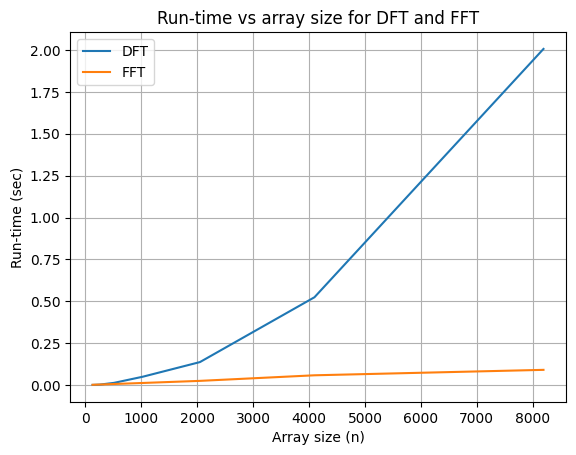

In [26]:


def fft1(x):
    N = len(x)
    if N <= 1:
        return x
    else:
        even = fft1(x[0::2])
        odd = fft1(x[1::2])
        factor = np.exp(-2j * np.pi * np.arange(N) / N)
        return np.concatenate([even + factor[:N // 2] * odd, even + factor[N // 2:] * odd])

def fft2(x):
    M, N = x.shape
    padded_M = 2 ** int(np.ceil(np.log2(M)))
    padded_N = 2 ** int(np.ceil(np.log2(N)))

    padded_x = np.zeros((padded_M, padded_N), dtype=x.dtype)
    padded_x[:M, :N] = x

    fft_rows = np.zeros_like(padded_x, dtype=np.complex128)
    for i in range(padded_M):
        fft_rows[i, :] = fft1(padded_x[i, :])

    fft_cols = np.zeros_like(padded_x, dtype=np.complex128)
    for j in range(padded_N):
        fft_cols[:, j] = fft1(fft_rows[:, j])

    return fft_cols

def dft1(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X

def dft2(x):
    M, N = x.shape
    X = np.zeros_like(x, dtype=np.complex128)

    for i in range(M):
        X[i, :] = dft1(x[i, :])

    for j in range(N):
        X[:, j] = dft1(X[:, j])

    return X

ar_size = np.arange(7)
ar_size = 2**(ar_size+7)
low = 0
high = 100

run_time_dft = []
run_time_fft = []

for n in ar_size:
    ar = np.random.randint(low=low, high=high, size=n)
    t1 = time.time()
    ar_dft = dft1(ar)
    t2 = time.time()
    run_time_dft.append(t2-t1)
    t1 = time.time()
    ar_fft = fft1(ar)
    t2 = time.time()
    run_time_fft.append(t2-t1)

plt.plot(ar_size, np.array(run_time_dft), label='DFT')
plt.plot(ar_size, np.array(run_time_fft), label='FFT')
plt.xlabel('Array size (n)')
plt.ylabel('Run-time (sec)')
plt.title('Run-time vs array size for DFT and FFT')
plt.legend()
plt.grid()
plt.show()



## Comparison between 1D FFT and 1D DFT Complexity

### 1D DFT (Discrete Fourier Transform) Algorithm:

The complexity of the 1D DFT algorithm is \(O(N^2)\), where \(N\) is the size of the input array. This is due to the direct computation of each element in the output array, involving \(N\) complex multiplications and \(N\) complex additions for each output element. The nested loops for these operations contribute to the quadratic time complexity.

### 1D FFT (Fast Fourier Transform) Algorithm:

The 1D FFT algorithm significantly improves the efficiency of computing the Fourier Transform compared to the direct DFT algorithm. The Cooley-Tukey radix-2 decimation-in-time (DIT) algorithm is a common implementation of the FFT for powers of 2. The complexity of the Cooley-Tukey FFT algorithm is \(O(N \log N)\), which represents a substantial improvement over the \(O(N^2)\) complexity of the direct DFT algorithm.

**Time Complexity:**
   - **1D DFT:** \(O(N^2)\)
   - **1D FFT:** \(O(N log N)\)



The 1D FFT algorithm outperforms the 1D DFT algorithm in terms of time complexity, making it the preferred choice for applications where computational efficiency is critical. The FFT's divide-and-conquer strategy allows for faster computation of the Fourier Transform.


# Functions for dft, fft and ifft

In [33]:
def dft1(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(-2j * np.pi * k * n / N)
    X = np.dot(e, x)
    return X

def dft2(x):
    M, N = x.shape
    X = np.zeros_like(x, dtype=np.complex128)

    # Apply 1D DFT along each row
    for i in range(M):
        X[i, :] = dft1(x[i, :])

    # Apply 1D DFT along each column
    for j in range(N):
        X[:, j] = dft1(X[:, j])

    return X

def fft1(a):
    n = a.shape[1]
    if n == 1:
        y = a
        return y
    even_ar = a[:, 0 : n : 2]
    odd_ar = a[:, 1 : n : 2]
    y_even = fft1(even_ar);
    y_odd = fft1(odd_ar);
    E = []
    for k in range(int(n / 2)):
        E.append(np.exp(np.complex(0, -1) * 2.0 * np.pi * k / n))
    E = np.array(E)
    y = []
    y = y_even + E * y_odd
    y = np.append(y, y_even - E * y_odd, axis = 1)
    return y

def fft2(I):
    column_fft = fft1(I)
    column_fft = np.transpose(column_fft)
    Y = fft1(column_fft)
    Y = np.transpose(Y)
    return Y



def ifft1(x):
    N = len(x)
    n = np.arange(N)
    k = n.reshape((N, 1))
    e = np.exp(2j * np.pi * k * n / N)
    X = np.dot(e, x) / N
    return X

def ifft2(x):
    M, N = x.shape
    X = np.zeros_like(x, dtype=np.complex128)

    # Apply 1D IFFT along each row
    for i in range(M):
        X[i, :] = ifft1(x[i, :])

    # Apply 1D IFFT along each column
    for j in range(N):
        X[:, j] = ifft1(X[:, j])

    return X



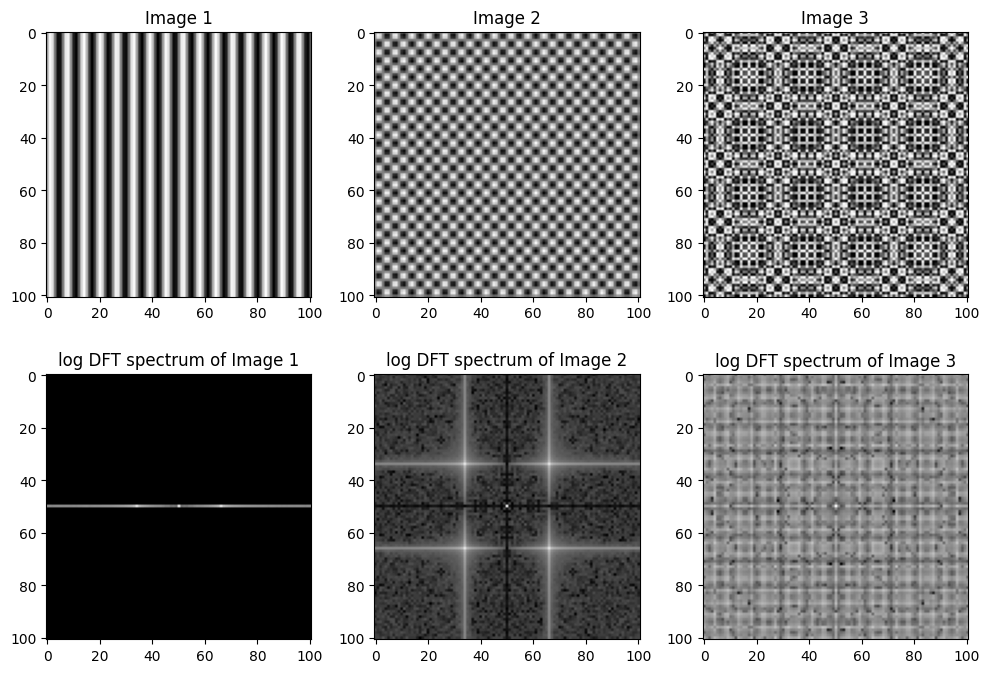

In [10]:
# creating images according to pixel intensities
m,n=101,101
x = np.arange(m)
x = np.tile(x,(n,1))-m//2
y = np.arange(n).reshape(n,1)
y = np.tile(y,(1,m))-n//2

i1 = minmax_scale(0.5*(1+np.sin(x)))
i2 = minmax_scale(0.5*(1+np.sin(x)*np.sin(y)))
i3 = minmax_scale(0.5*(1+np.sin(x**2+y**2)))

I1 = np.fft.fftshift(dft2(i1))
I2 = np.fft.fftshift(dft2(i2))
I3 = np.fft.fftshift(dft2(i3))

fig, axs = plt.subplots(2, 3, figsize=(10, 7))  # Adjust the figsize as needed

# Plot the images
axs[0][0].imshow(i1, cmap='gray')
axs[0][0].set_title('Image 1')

axs[0][1].imshow(i2, cmap='gray')
axs[0][1].set_title('Image 2')

axs[0][2].imshow(i3, cmap='gray')
axs[0][2].set_title('Image 3')


visualize_dft_pattern(I1,axs[1][0])
axs[1][0].set_title('log DFT spectrum of Image 1')


visualize_dft_pattern(I2,axs[1][1])
axs[1][1].set_title('log DFT spectrum of Image 2')

visualize_dft_pattern(I3,axs[1][2])
axs[1][2].set_title('log DFT spectrum of Image 3')

plt.tight_layout()
plt.show()

### Applying DFT on IMG1

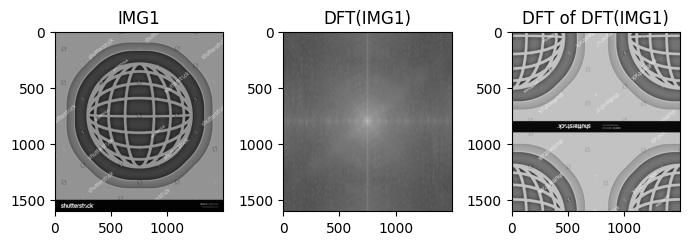

In [13]:
image_path = "./1024_1024.jpg"
img = cv2.imread(image_path)
img = cv2.cvtColor(img, cv2.COLOR_BGR2GRAY)

img = np.array(img)
IMG = (np.fft.fftshift(dft2(img)))
dft_IMG = (np.fft.fftshift(dft2(IMG)))


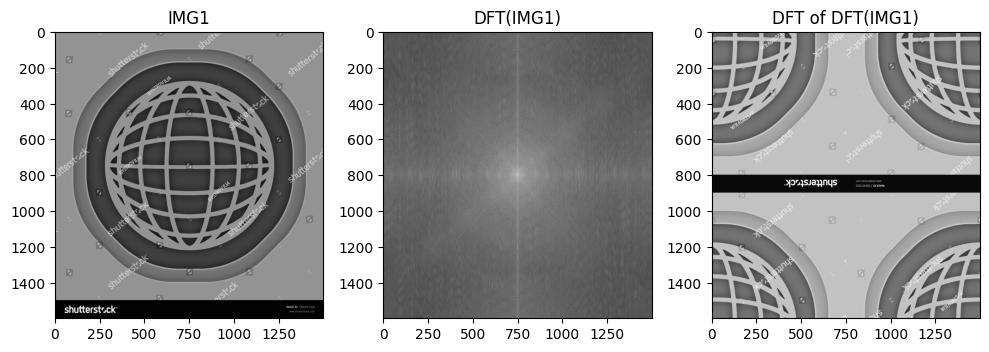

In [15]:

fig, axs = plt.subplots(1, 3, figsize=(10, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('IMG1')

visualize_dft_pattern(IMG,axs[1])
axs[1].set_title('DFT(IMG1)')

visualize_dft_pattern(dft_IMG,axs[2])
axs[2].set_title('DFT of DFT(IMG1)')

plt.tight_layout()
plt.show()

### Observations

- The DFT of IMG1 spreads in all directions mostly. However, its spread in the horizontal and vertical directions are more prominent due 
to the vertical and horizontal (almost parallel) high frequency lines in the globe in IMG1.

- We can also see some text written diaognally along the image in repeated manner. This accounts for most of the diaognal spreads in the DFT.

- High intensity is seen at origin denoting large presence of low frequency patches.

- On performing the DFT over the DFT of IMG1, we again get back the original IMG1 eith the effect that the result is shifted by a phase of $pi$ along with some scaling the intensity of the image.

### Using the IFFT function on IMG1

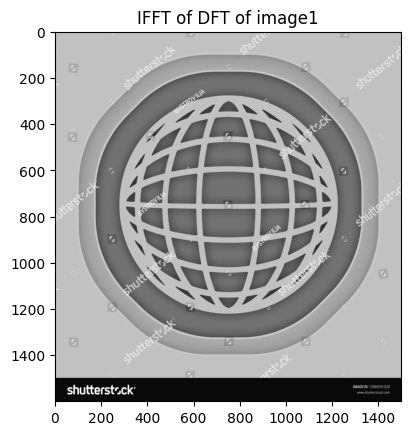

In [26]:
ifft_img1 = ifft2(IMG)

plt.title('IFFT of DFT of image1')
visualize_dft_pattern(ifft_img1,plt)
plt.show()

### Low pass filters (Ideal and Gaussian)

In [30]:
def idealLPF(img,D):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift))
    new_transform = np.copy(fshift)
    rows = new_transform.shape[0]
    cols = new_transform.shape[1]
    for i in range(rows):
        for j in range(cols):
            if np.sqrt((i - (rows / 2)) * (i - (rows / 2)) + (j - (cols / 2)) * (j - (cols / 2))) <= D:
                new_transform[i][j] = fshift[i][j]
            else:
                new_transform[i][j] = 0

    f_ishift = np.fft.ifftshift(new_transform)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)

    return img_back


def gaussianLPF(img,D0):
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(np.abs(fshift))
    new_transform = np.copy(fshift)
    rows = new_transform.shape[0]
    cols = new_transform.shape[1]
    for i in range(rows):
        for j in range(cols):
            D = np.sqrt((i - (rows / 2)) * (i - (rows / 2)) + (j - (cols / 2)) * (j - (cols / 2))) 
            new_transform[i][j] = np.exp(-(D * D) / (2 * D0 * D0)) * fshift[i][j]

    f_ishift = np.fft.ifftshift(new_transform)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
    
    return img_back


### Applying Ideal Low pass filter with different cutoffs

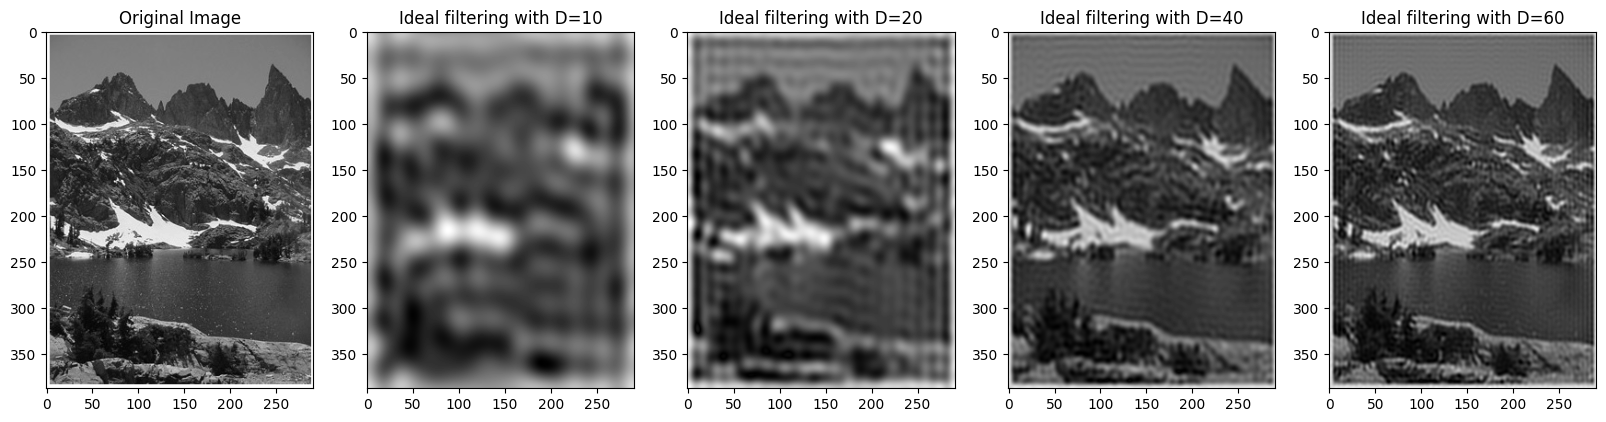

In [34]:
img = cv2.imread('./lakeside.jpg', cv2.IMREAD_GRAYSCALE)

img1 = idealLPF(img,10)
img2 = idealLPF(img,20)
img3 = idealLPF(img,40)
img4 = idealLPF(img,60)

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(img1, cmap='gray')
axs[1].set_title('Ideal filtering with D=10')

axs[2].imshow(img2, cmap='gray')
axs[2].set_title('Ideal filtering with D=20')

axs[3].imshow(img3, cmap='gray')
axs[3].set_title('Ideal filtering with D=40')

axs[4].imshow(img4, cmap='gray')
axs[4].set_title('Ideal filtering with D=60')

plt.show()


## Observations : 
- As the curoff frequenct is low, more artifacts are observed in the filtered image. This arises directly from the fact that we are using a sharp transfer function (ideal) for filtering ($H$). The inverse fourier transform of it will be affected with sinc ripples and over/under-shoots. (Due to mathimatics, the inverse fourier transform of box is sinc). This causes ripples in the filtered image. 

- The effect of ripples decreases (visually) and vanishes after some larger cutoff frequency.

### Applying Gaussian Low pass filter with different cutoffs

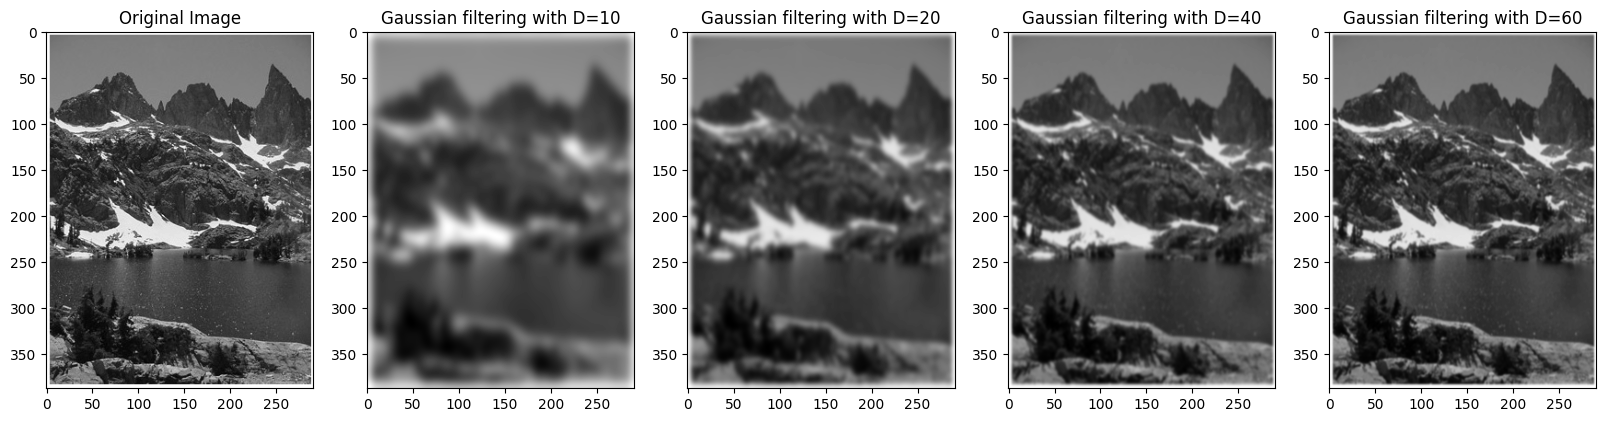

In [32]:
img = cv2.imread('./lakeside.jpg', cv2.IMREAD_GRAYSCALE)

img1 = gaussianLPF(img,10)
img2 = gaussianLPF(img,20)
img3 = gaussianLPF(img,40)
img4 = gaussianLPF(img,60)

fig, axs = plt.subplots(1, 5, figsize=(20, 5))
axs[0].imshow(img, cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(img1, cmap='gray')
axs[1].set_title('Gaussian filtering with D=10')

axs[2].imshow(img2, cmap='gray')
axs[2].set_title('Gaussian filtering with D=20')

axs[3].imshow(img3, cmap='gray')
axs[3].set_title('Gaussian filtering with D=40')

axs[4].imshow(img4, cmap='gray')
axs[4].set_title('Gaussian filtering with D=60')

plt.show()


## Observations

- On increasing the kernel size in Gaussian Blurring, the blurring increased. On increasing the cutoff frequency in Gaussian Filtering, the blurring decreased.
- Applying gaussian blurring on an image is similar to convolving with a gaussian kernel $H$. Applying a gaussian filter is same as convolving with the inverse fourier transform of a Gaussian Function. However, the inverse fourier transform of a gaussian function is also a gaussian function, thus, the results obtained on blurring are very similar.
- One major difference that we can observe is that while in Gaussian Smoothing, the amount of blurring increases slowly as the kernel size increases. In case of gaussian filtering, as we slowly increase the cutoff, the blurring sharply decreases and after a certain value almost negligible changes are observed. This is due to the fact that the gaussian smoothing operates in the spatial domain, which is directly related to out perception of the image, the gaussian filtering focuses on selective removal of absolute frequencies, something we humans can not percieve easily.

- Both the filters cause blurring, but the blurring is controlled through different parameters. 


## Denoising Spotted Image

In [406]:
def filterImage(img):
    r1 = 45
    r2 = 80
    
    f = np.fft.fft2(img)
    fshift = np.fft.fftshift(f)
    magnitude_spectrum = np.log(1 + np.abs(fshift))

    center_x, center_y = (img.shape[1] - 1) / 2, (img.shape[0] - 1) / 2
    y, x = np.ogrid[:img.shape[0], :img.shape[1]]
    distance_from_center = np.sqrt((x - center_x) ** 2 + (y - center_y) ** 2)
    
    kernel = np.zeros(img.shape, dtype=np.float32)
    kernel[(distance_from_center >= r1) & (distance_from_center <= r2)] = 1
    kernel = 1-kernel
    
    Y = kernel*fshift
    
    f_ishift = np.fft.ifftshift(Y)
    img_back = np.fft.ifft2(f_ishift)
    img_back = np.abs(img_back)
     
    fig, axs = plt.subplots(1, 5, figsize=(20, 5))
    axs[0].imshow(img,cmap='gray')
    axs[0].set_title('Original Noisy Image')
   
    axs[1].imshow(magnitude_spectrum,cmap='gray')
    axs[1].set_title('Magnitude Spectrum')

    axs[2].imshow(kernel,cmap='gray')
    axs[2].set_title('Band-stop Kernel to remove Noisy Freq.')

    axs[3].imshow(kernel*magnitude_spectrum,cmap='gray')
    axs[3].set_title('Filtered magnitude spectrum')

    axs[4].imshow(img_back,cmap='gray')
    axs[4].set_title('Recovered Image')
    plt.show()
    
    return img_back

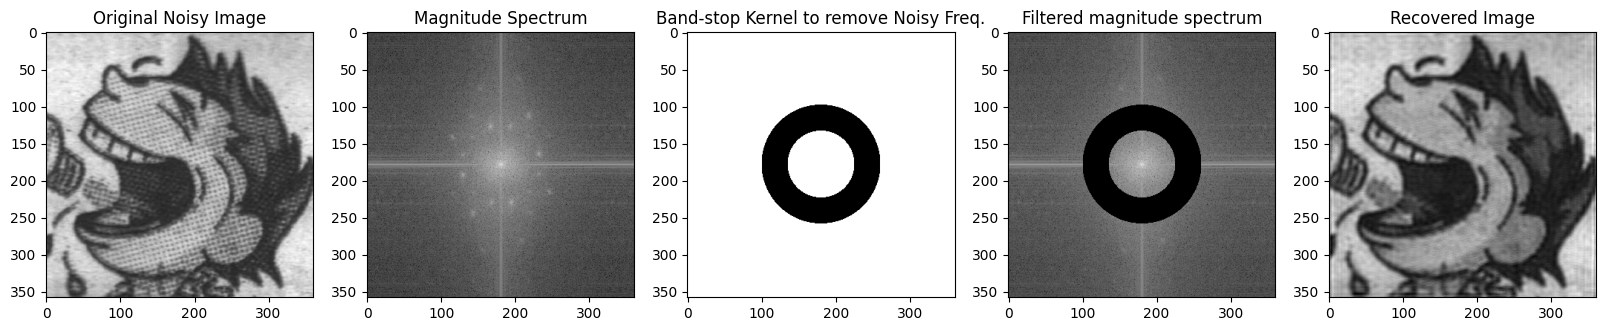

In [407]:
denoised_image = filterImage(img)

Text(0.5, 1.0, 'Denoised Image')

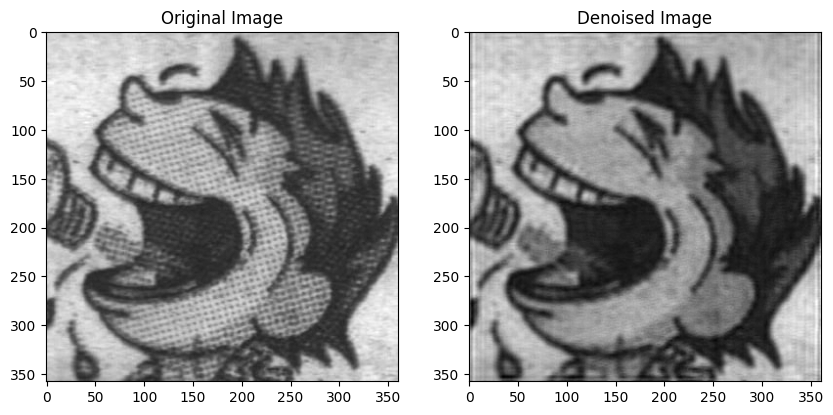

In [397]:
fig, axs = plt.subplots(1, 2, figsize=(10, 5))
axs[0].imshow(img,cmap='gray')
axs[0].set_title('Original Image')

axs[1].imshow(denoised_image,cmap='gray')
axs[1].set_title('Denoised Image')
